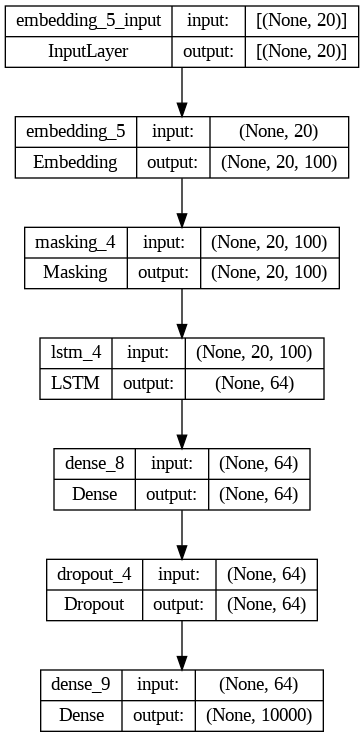

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
from keras.utils import plot_model
import numpy as np

# Define the value for num_words
num_words = 10000  # For example, set it to 10,000 if you have 10,000 words in your vocabulary

# Define the value for training_length
training_length = 20  # For example, set it to 20 if your input sequences have a length of 20 words

# Initialize the embedding matrix with random values
embedding_dim = 100  # For example, set it to 100 for a 100-dimensional embedding
embedding_matrix = np.random.rand(num_words, embedding_dim)

model = Sequential()

# Embedding layer
model.add(
    Embedding(input_dim=num_words,
              input_length=training_length,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              trainable=False,
              mask_zero=True))

# Masking layer for pre-trained embeddings
model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False,
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_words, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True)


Epoch 1/50
413/413 [==============================] - 5s 7ms/step - loss: 1.7292 - val_loss: 0.5562
Epoch 2/50
413/413 [==============================] - 2s 4ms/step - loss: 0.4715 - val_loss: 0.4628
Epoch 3/50
413/413 [==============================] - 2s 5ms/step - loss: 0.4171 - val_loss: 0.4310
Epoch 4/50
413/413 [==============================] - 2s 4ms/step - loss: 0.3969 - val_loss: 0.4181
Epoch 5/50
413/413 [==============================] - 2s 4ms/step - loss: 0.3857 - val_loss: 0.4091
Epoch 6/50
413/413 [==============================] - 2s 4ms/step - loss: 0.3786 - val_loss: 0.4053
Epoch 7/50
413/413 [==============================] - 2s 5ms/step - loss: 0.3719 - val_loss: 0.3988
Epoch 8/50
413/413 [==============================] - 2s 5ms/step - loss: 0.3666 - val_loss: 0.3929
Epoch 9/50
413/413 [==============================] - 2s 4ms/step - loss: 0.3614 - val_loss: 0.3921
Epoch 10/50
413/413 [==============================] - 1s 4ms/step - loss: 0.3576 - val_loss: 0.3853

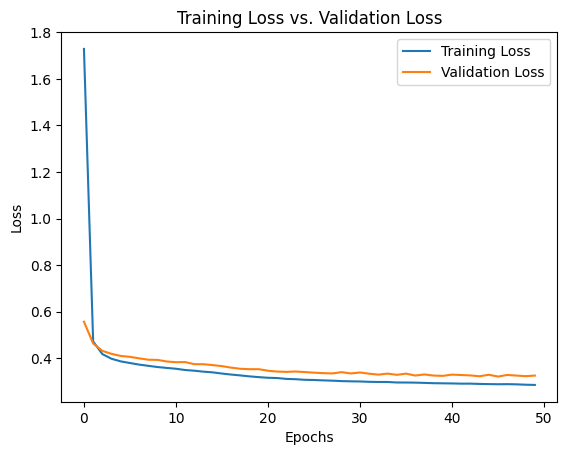

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and get the training history
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
mse = model.evaluate(X_test_reshaped, y_test)
print('Test MSE:', mse)

# Plot the training loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()
